In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 데이터를 불러오고 데이터의 모양 확인

In [2]:
dataset = pd.read_csv("train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
features = pd.read_csv("features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("stores.csv", names=['Store','Type','Size'],sep=',', header=0)
dataset = dataset.merge(stores, how='left').merge(features, how='left')

In [3]:
dataset.head()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
dataset.tail()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


### 데이터의 세부 내용 확인

In [5]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'weeklySales', 'isHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

여기서 관심이 있는 변수인, store과 date, weeklysales, isholiday, temperature을 중점적으로 살펴보자

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
weeklySales     421570 non-null float64
isHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


### 기초통계량

In [7]:
dataset.describe()  # 수치형 변수들에 대한 기초통계량

,Store,Dept,weeklySales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [8]:
dataset.describe(include='O') # 범주형 변수에 대한 기초통계량

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


### 결측값 확인

In [9]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
weeklySales          0
isHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

### holiday의 여부를 1과 0으로 나누기
    -0 : holiday가 아니다.(True)
    -1 : holiday이다.(False)

In [10]:
# 총 데이터의 개수
len(dataset)

421570

In [11]:
dataset.isHoliday.value_counts(normalize=True)

False    0.929642
True     0.070358
Name: isHoliday, dtype: float64

휴일인 날은 전체 데이터의 수 중 7%만을 차지합니다.

In [5]:
dataset[['isHoliday', 'weeklySales']].groupby(['isHoliday'], as_index=True).mean().sort_values(by='weeklySales', ascending=False)

,weeklySales
isHoliday,
True,17035.823187
False,15901.445069


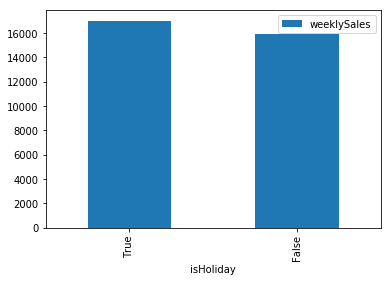

In [3]:
dataset[['isHoliday', 'weeklySales']].groupby(['isHoliday'], as_index=True).mean().sort_values(by='weeklySales', ascending=False).plot.bar()

# 날씨와 매출액에 대해 알아보자

### 날씨와 매출액에 대한 산점도

Text(0.5, 0, 'Temperature')

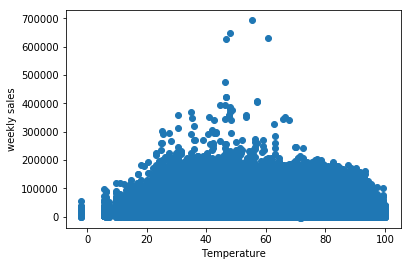

In [5]:
plt.figure()
plt.scatter(dataset.Temperature, dataset['weeklySales'])
plt.ylabel('weekly sales')
plt.xlabel('Temperature')

### 날씨와 매출액간의 상관도

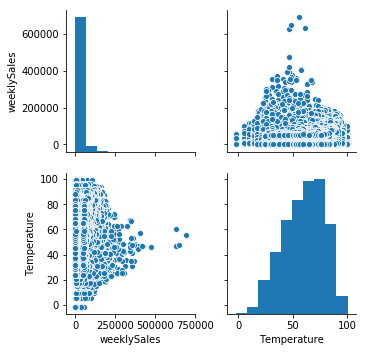

In [7]:
sns.pairplot(dataset.fillna(0), vars=['weeklySales', 'Temperature'])

In [10]:
dataset[['Temperature', 'weeklySales']].corr(method='pearson')

,Temperature,weeklySales
Temperature,1.000000,-0.002312
weeklySales,-0.002312,1.000000


온도가 높아질수록 주간 매출액은 떨어지는 경향이 있다. 
즉, 약한 음의 방향성이 있다고 할 수 있다,

온도를 다섯개의 bond로 묶어서 데이터를 자른다

In [17]:
dataset[['Temperature', 'weeklySales']].groupby(['Temperature'], as_index=False).mean().sort_values(by='Temperature', ascending=True)

,Temperature,weeklySales
0,"(-2.162, 18.38]",12530.284848
1,"(18.38, 38.82]",15923.855304
2,"(38.82, 59.26]",16247.498595
3,"(59.26, 79.7]",16139.425496
4,"(79.7, 100.14]",15351.915529


하지만, 다섯개로 나누는 것 보다는 네 개로 나눠서  매출액의 차이를 보려고 한다.

In [8]:
dataset['Temperature']=pd.cut(dataset['Temperature'], 4)

In [9]:
dataset[['Temperature', 'weeklySales']].groupby(['Temperature'], as_index=False).mean().sort_values(by='Temperature', ascending=True)

,Temperature,weeklySales
0,"(-2.162, 23.49]",13399.509457
1,"(23.49, 49.04]",16402.430858
2,"(49.04, 74.59]",15974.026497
3,"(74.59, 100.14]",15849.584520


In [10]:
dataset.Temperature.describe()

count             421570
unique                 4
top       (49.04, 74.59]
freq              197196
Name: Temperature, dtype: object

In [11]:
dataset.Temperature.value_counts(normalize=True)

(49.04, 74.59]     0.467766
(23.49, 49.04]     0.258413
(74.59, 100.14]    0.245497
(-2.162, 23.49]    0.028325
Name: Temperature, dtype: float64

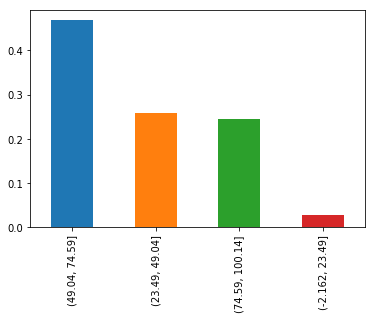

In [12]:
dataset.Temperature.value_counts(normalize=True).plot.bar()

In [14]:
dataset[['Temperature', 'weeklySales']].groupby(['Temperature'], as_index=False).mean()

,Temperature,weeklySales
0,"(-2.162, 23.49]",13399.509457
1,"(23.49, 49.04]",16402.430858
2,"(49.04, 74.59]",15974.026497
3,"(74.59, 100.14]",15849.584520


먼저, 기온이 매우 낮을 때 즉 -2~23 화씨온도일 때, 사람들은 쇼핑을 하러 나오지 않는다는 것을 알 수 있다. 49~74 화씨온도일 때 가장 많이 쇼핑을 나온다는 것을 알 수 있다.